In [1]:
# Loading event json
import json
import math
# Plotting the timeline
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [2]:
Default & 100m & 15.7 $\pm$ 0.6 & 31.7 $\pm$ 2.1 & 56 $\pm$ 1.7 & 84.7 $\pm$
        0.6 & 112 $\pm$ 0.0 \\
    Default & 200m & 15.7 $\pm$ 0.7 & 30.7 $\pm$ 0.6 & 55 $\pm$ 1 & 79 $\pm$ 0.0
        & 103 $\pm$ 1 \\
    Default & 500m & 15.7 $\pm$ 1.2 & 32 $\pm$ 2.6 & 57.7 $\pm$ 0.6 & 81 $\pm$ 2
        & 104 $\pm$ 2.1 \\
    Default & 1000m & 21 $\pm$ 2.0 & 54.7 $\pm$ 0.6 & 96 $\pm$ 2.6 & 133 $\pm$
        0.6 & 175 $\pm$ 1 \\
    \textsc{Carico} &  & 20.3 $\pm$ 0.6 & 35.3 $\pm$ 0.6 & 60.3 $\pm$ 2.5 & 89 $\pm$ 2 &
        109$\pm$ 1 \\

SyntaxError: invalid decimal literal (3929383246.py, line 1)

In [3]:
completion = {
    '100m': {
        100: 15.7,
        250: 31.7,
        500: 56,
        750: 84.7,
        1000: 112,
    },
    '200m': { # Second Row
        100: 15.7,
        250: 30.7,
        500: 55,
        750: 79,
        1000: 103,
    },
    '500m': { # Third Row
        100: 15.7,
        250: 32,
        500: 57.7,
        750: 81,
        1000: 104,
    },
    '1000m': { # Fourth Row
        100: 21,
        250: 54.7,
        500: 96,
        750: 133,
        1000: 175,
    },
    # Note: The last row 'Carico' doesn't have the '100m', '200m' etc.
    # It appears to be a different category.
    # Assuming the same 100, 250, 500, 750, 1000 keys for 'Carico'
    # based on the number of values provided.
    'Carico': { # Fifth Row
        100: 20.3,
        250: 35.3,
        500: 60.3,
        750: 89,
        1000: 109,
    }
}


Transformed DataFrame:
   Scheduler Pod Count  Completion Time
0       100m       100             15.7
1       100m       250             31.7
2       100m       500             56.0
3       100m       750             84.7
4       100m      1000            112.0
5       200m       100             15.7
6       200m       250             30.7
7       200m       500             55.0
8       200m       750             79.0
9       200m      1000            103.0
10      500m       100             15.7
11      500m       250             32.0
12      500m       500             57.7
13      500m       750             81.0
14      500m      1000            104.0
15     1000m       100             21.0
16     1000m       250             54.7
17     1000m       500             96.0
18     1000m       750            133.0
19     1000m      1000            175.0
20    Carico       100             20.3
21    Carico       250             35.3
22    Carico       500             60.3
23    Carico     

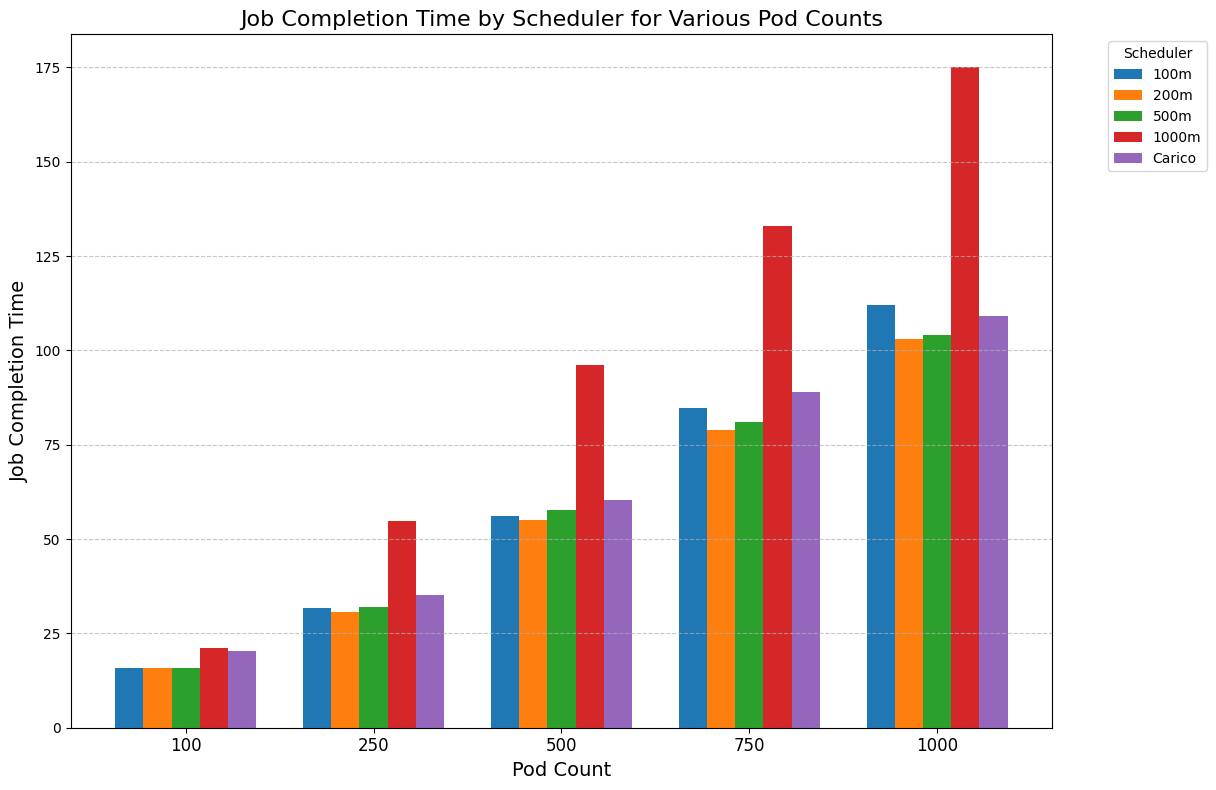

In [4]:

# --- Data Transformation ---
# We want 'Pod Count' as main categories, 'Scheduler' as subcategories (for grouping)
# and 'Completion Time' as values.

# Create a list to hold records
records = []
for scheduler, pod_data in completion.items():
    for pod_count, completion_time in pod_data.items():
        records.append({'Scheduler': scheduler, 'Pod Count': pod_count, 'Completion Time': completion_time})

df = pd.DataFrame(records)

# Ensure 'Pod Count' is treated as a category for correct ordering on x-axis
df['Pod Count'] = df['Pod Count'].astype('category')
df['Pod Count'] = df['Pod Count'].cat.reorder_categories(sorted(df['Pod Count'].unique()), ordered=True)

print("Transformed DataFrame:")
print(df)
print("\n")

# --- Plotting with Matplotlib ---

# Get unique pod counts and schedulers
pod_counts = df['Pod Count'].unique()
schedulers = df['Scheduler'].unique()

num_schedulers = len(schedulers) # Number of bars per group (for each pod count)
bar_width = 0.15 # Width of each individual bar
spacing_between_groups = 0.8 # Total space allocated for bars within one group

# Base positions for the main x-axis ticks (each pod count)
x_positions = np.arange(len(pod_counts))

plt.figure(figsize=(14, 8)) # Adjust figure size for better readability

# Loop through each scheduler to plot its bars
for i, scheduler in enumerate(schedulers):
    # Calculate the offset for the current scheduler's bars within each group
    # This centers the group of bars around the x_positions
    offset = (i - num_schedulers / 2 + 0.5) * bar_width

    # Filter data for the current scheduler and extract completion times
    # Ensure the order of values matches the order of pod_counts
    scheduler_data = df[df['Scheduler'] == scheduler].set_index('Pod Count').loc[pod_counts]
    values = scheduler_data['Completion Time'].values

    # Plot the bars
    plt.bar(x_positions + offset, values, bar_width, label=scheduler)

# Set x-ticks at the center of each group and label them with pod counts
plt.xticks(x_positions, pod_counts, fontsize=12)

plt.xlabel('Pod Count', fontsize=14)
plt.ylabel('Job Completion Time', fontsize=14)
plt.title('Job Completion Time by Scheduler for Various Pod Counts', fontsize=16)
plt.legend(title='Scheduler', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust layout to make space for the legend
plt.show()

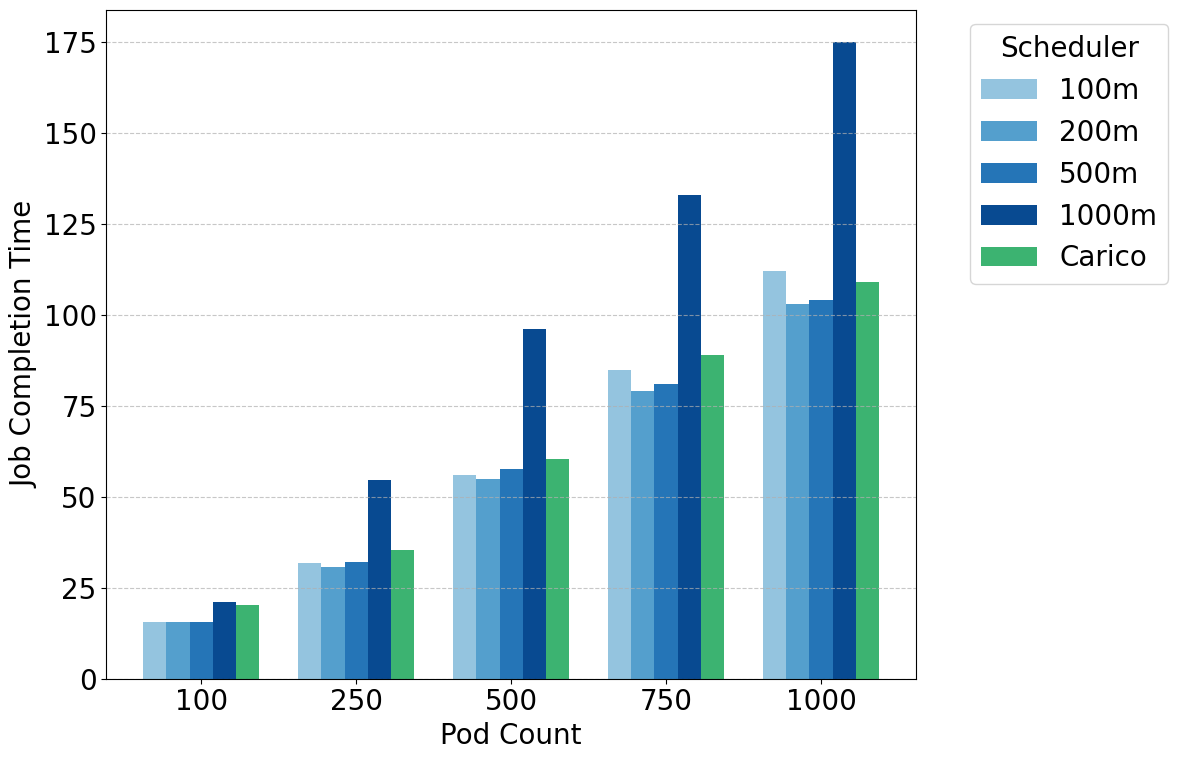

In [11]:
# --- Data Transformation (same as before) ---
records = []
for scheduler, pod_data in completion.items():
    for pod_count, completion_time in pod_data.items():
        records.append({'Scheduler': scheduler, 'Pod Count': pod_count, 'Completion Time': completion_time})

df = pd.DataFrame(records)

df['Pod Count'] = df['Pod Count'].astype('category')
df['Pod Count'] = df['Pod Count'].cat.reorder_categories(sorted(df['Pod Count'].unique()), ordered=True)

# --- Define Custom Colors ---
# Creating a list of shades of blue and then adding green for 'Carico'
blue_shades = plt.cm.Blues(np.linspace(0.4, 0.9, 4)) # Adjust 0.4 to 0.9 for lighter/darker blues
custom_colors = {
    '100m': blue_shades[0],
    '200m': blue_shades[1],
    '500m': blue_shades[2],
    '1000m': blue_shades[3],
    'Carico': 'mediumseagreen' # A nice shade of green
}

# --- Plotting with Matplotlib ---
plt.rcParams['font.size'] = 20
pod_counts = df['Pod Count'].unique()
schedulers = df['Scheduler'].unique() # This order matters for color assignment

num_schedulers = len(schedulers)
bar_width = 0.15
x_positions = np.arange(len(pod_counts))

plt.figure(figsize=(14, 8))

for i, scheduler in enumerate(schedulers):
    offset = (i - num_schedulers / 2 + 0.5) * bar_width

    scheduler_data = df[df['Scheduler'] == scheduler].set_index('Pod Count').loc[pod_counts]
    values = scheduler_data['Completion Time'].values

    # Use the custom color for the current scheduler
    color = custom_colors.get(scheduler, 'gray') # Default to gray if color not found
    plt.bar(x_positions + offset, values, bar_width, label=scheduler, color=color)

plt.xticks(x_positions, pod_counts)
plt.xlabel('Pod Count')
plt.ylabel('Job Completion Time')
# plt.title('Job Completion Time by Scheduler for Various Pod Counts', fontsize=16)
plt.legend(title='Scheduler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig(f'../figures/pi-job-completion.pdf')    
plt.show()

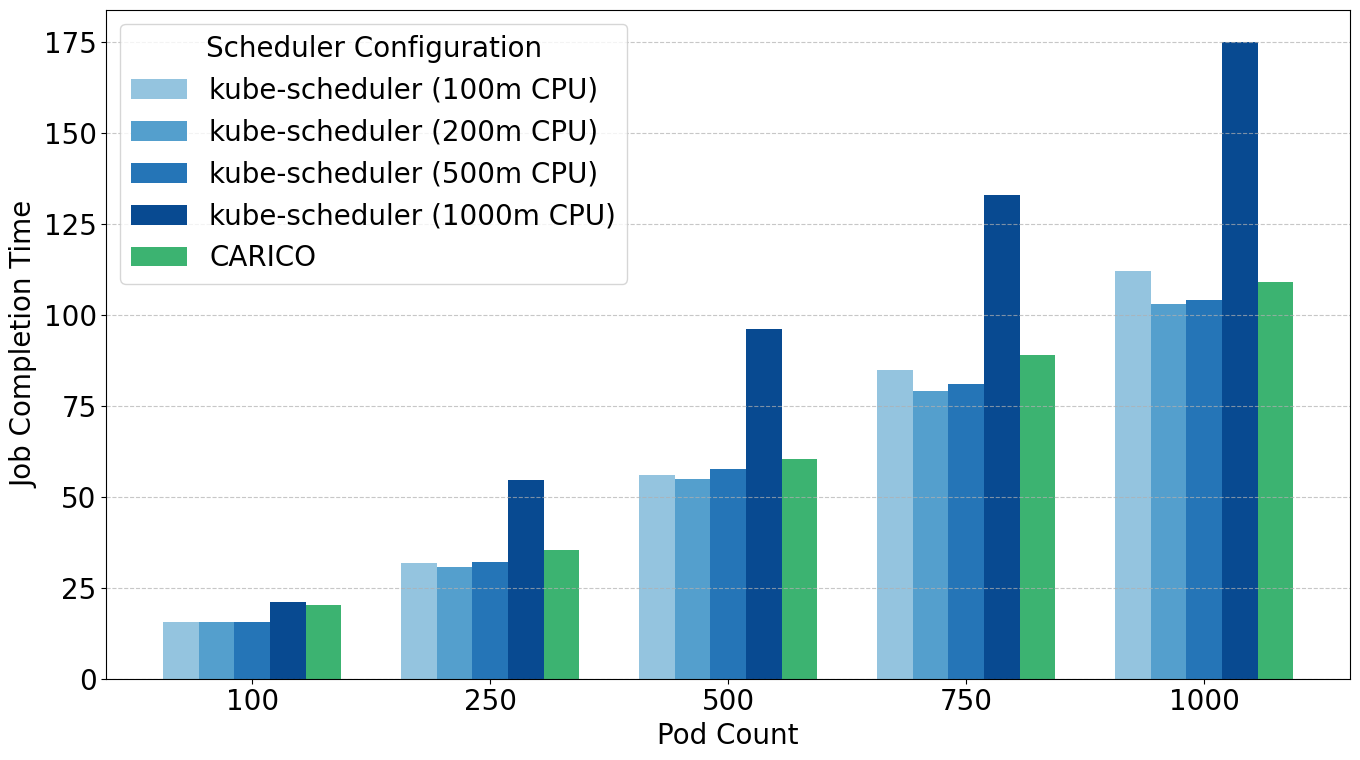

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

completion = {
    '100m': {100: 15.7, 250: 31.7, 500: 56, 750: 84.7, 1000: 112},
    '200m': {100: 15.7, 250: 30.7, 500: 55, 750: 79, 1000: 103},
    '500m': {100: 15.7, 250: 32, 500: 57.7, 750: 81, 1000: 104},
    '1000m': {100: 21, 250: 54.7, 500: 96, 750: 133, 1000: 175},
    'Carico': {100: 20.3, 250: 35.3, 500: 60.3, 750: 89, 1000: 109}
}

# --- Data Transformation (same as before) ---
records = []
for scheduler, pod_data in completion.items():
    for pod_count, completion_time in pod_data.items():
        records.append({'Scheduler': scheduler, 'Pod Count': pod_count, 'Completion Time': completion_time})

df = pd.DataFrame(records)

df['Pod Count'] = df['Pod Count'].astype('category')
df['Pod Count'] = df['Pod Count'].cat.reorder_categories(sorted(df['Pod Count'].unique()), ordered=True)

# --- Define Custom Colors ---
blue_shades = plt.cm.Blues(np.linspace(0.4, 0.9, 4))
custom_colors = {
    '100m': blue_shades[0],
    '200m': blue_shades[1],
    '500m': blue_shades[2],
    '1000m': blue_shades[3],
    'Carico': 'mediumseagreen'
}

# --- Define Custom Legend Labels ---
# This dictionary will map the internal scheduler name to the desired legend text
legend_labels = {
    '100m': 'kube-scheduler (100m CPU)',
    '200m': 'kube-scheduler (200m CPU)',
    '500m': 'kube-scheduler (500m CPU)',
    '1000m': 'kube-scheduler (1000m CPU)',
    'Carico': 'CARICO' # Carico remains as is
}

# --- Plotting with Matplotlib ---
plt.rcParams['font.size'] = 20
pod_counts = df['Pod Count'].unique()
schedulers = df['Scheduler'].unique()

num_schedulers = len(schedulers)
bar_width = 0.15
x_positions = np.arange(len(pod_counts))

plt.figure(figsize=(14, 8))

for i, scheduler in enumerate(schedulers):
    offset = (i - num_schedulers / 2 + 0.5) * bar_width

    scheduler_data = df[df['Scheduler'] == scheduler].set_index('Pod Count').loc[pod_counts]
    values = scheduler_data['Completion Time'].values

    color = custom_colors.get(scheduler, 'gray')

    # Get the customized label for the legend
    current_label = legend_labels.get(scheduler, scheduler) # Default to original if not found
    plt.bar(x_positions + offset, values, bar_width, label=current_label, color=color)

plt.xticks(x_positions, pod_counts)
plt.xlabel('Pod Count')
plt.ylabel('Job Completion Time')
# plt.title('Job Completion Time by Scheduler for Various Pod Counts', fontsize=16)
plt.legend(title='Scheduler Configuration', loc='upper left') # Updated legend title
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'figures/pi-job-completion.pdf')
plt.show()

In [63]:
statistics.mean([365, 357, 359])

360.3333333333333

Transformed DataFrame for plotting:
          Scheduler Pod Count  Completion Time
0   Default (750Mi)       100            144.3
1   Default (750Mi)       200            362.0
2  Default (1500Mi)       100            191.0
3  Default (1500Mi)       200            309.0
4  Default (3000Mi)       100            177.0
5  Default (3000Mi)       200            352.3
6  Default (4000Mi)       100            187.7
7  Default (4000Mi)       200            360.3
8            Carico       100            189.0
9            Carico       200            353.3




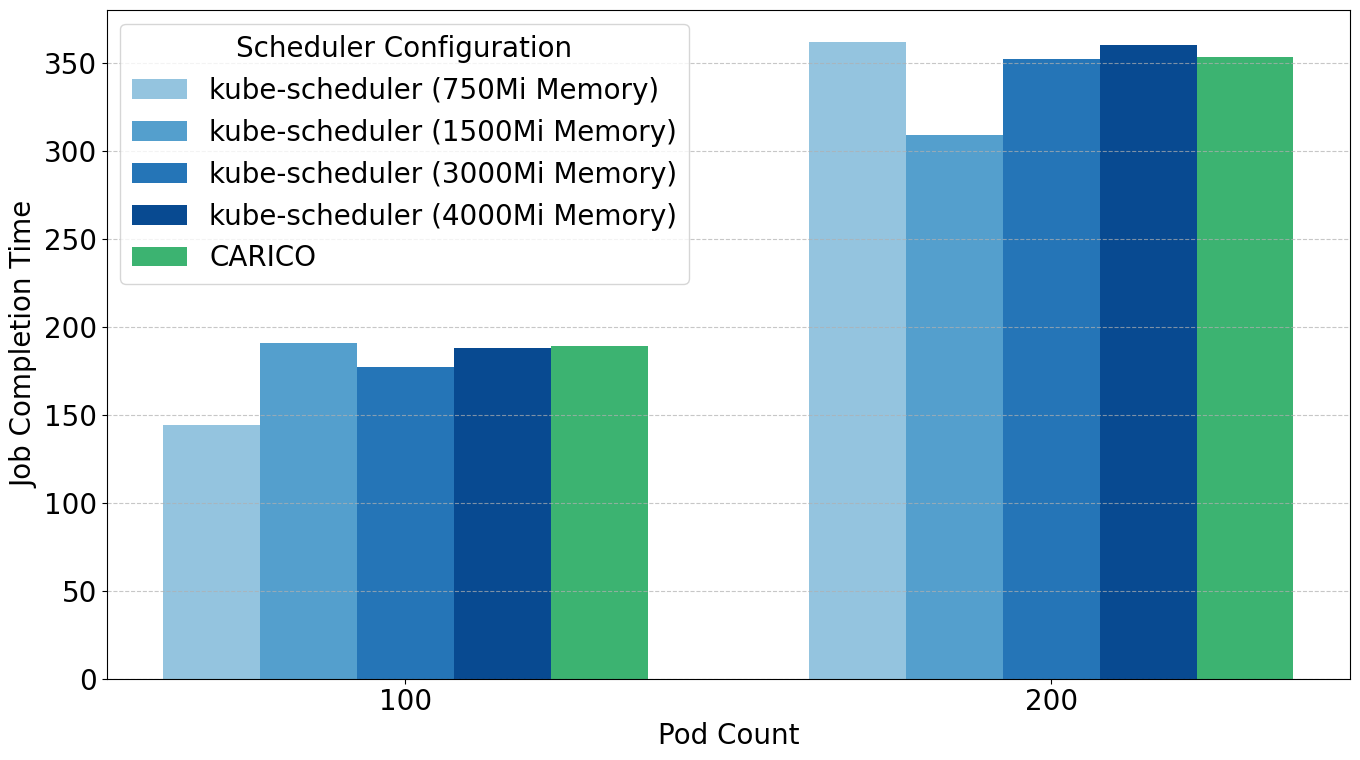

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# New data provided
# Inferring structure based on the previous context:
# The values 144.3, 362, 189, 353.3 are completion times
# The two columns of values for each configuration correspond to Pod Counts of 100 and 250
raw_data_input = [
    # {'scheduler_info': 'Default & 200m & 750Mi', 'values': {100: 144.3, 250: 362}}, # Original parsing thought
    # A more direct parsing based on distinct scheduler names:
    {'internal_scheduler_name': 'Default (750Mi)', 'completion_times': {100: 144.3, 200: 362}},
    # {'internal_scheduler_name': 'Default (1000Mi)', 'completion_times': {100: 145.6, 200: 307}},
    {'internal_scheduler_name': 'Default (1500Mi)', 'completion_times': {100: 191, 200: 309}},
    # {'internal_scheduler_name': 'Default (2000Mi)', 'completion_times': {100: 171, 200: 329}},
    {'internal_scheduler_name': 'Default (3000Mi)', 'completion_times': {100: 177, 200: 352.3}},
    {'internal_scheduler_name': 'Default (4000Mi)', 'completion_times': {100: 187.7, 200: 360.3}},
    {'internal_scheduler_name': 'Carico', 'completion_times': {100: 189, 200: 353.3}}
]



# --- Data Transformation ---
records = []
# Assuming the common 'Pod Count' points are 100 and 250 for consistency with previous data
measurement_points = [100, 200]

for entry in raw_data_input:
    scheduler_name = entry['internal_scheduler_name']
    for pod_count, completion_time in entry['completion_times'].items():
        records.append({'Scheduler': scheduler_name, 'Pod Count': pod_count, 'Completion Time': completion_time})

df = pd.DataFrame(records)

# Ensure 'Pod Count' is a categorical type for correct ordering on the x-axis
df['Pod Count'] = df['Pod Count'].astype('category')
df['Pod Count'] = df['Pod Count'].cat.reorder_categories(measurement_points, ordered=True)

print("Transformed DataFrame for plotting:")
print(df)
print("\n")

# --- Define Custom Colors ---
# A single shade of blue for the 'Default' configuration
# Green for 'Carico'
blue_shades = plt.cm.Blues(np.linspace(0.4, 0.9, 4))
custom_colors = {
    'Default (750Mi)': blue_shades[0],
    'Default (1500Mi)': blue_shades[1],
    'Default (3000Mi)': blue_shades[2],
    'Default (4000Mi)': blue_shades[3],
    'Carico': 'mediumseagreen'
}

# --- Define Custom Legend Labels ---
# Mapping internal scheduler names to user-friendly legend labels
legend_labels = {
    'Default (750Mi)': 'kube-scheduler (750Mi Memory)',
    'Default (1500Mi)': 'kube-scheduler (1500Mi Memory)',
    'Default (3000Mi)': 'kube-scheduler (3000Mi Memory)',
    'Default (4000Mi)': 'kube-scheduler (4000Mi Memory)',
    'Carico': 'CARICO'
}

# --- Plotting with Matplotlib ---
# plt.rcParams['font.size'] = 20

# Get unique pod counts (x-axis categories) and schedulers (groups of bars)
pod_counts = df['Pod Count'].unique()
schedulers = df['Scheduler'].unique()

num_schedulers = len(schedulers) # Number of bars in each group (2 in this case)
bar_width = 0.15 # Adjusted bar width for a smaller number of bars
x_positions = np.arange(len(pod_counts)) # Base x-positions for each group

plt.figure(figsize=(14, 8)) # Adjust figure size for a smaller dataset

# Loop through each scheduler to plot its bars
for i, scheduler in enumerate(schedulers):
    # Calculate the offset for the current scheduler's bars within each 'Pod Count' group
    offset = (i - num_schedulers / 2 + 0.5) * bar_width

    # Filter data for the current scheduler and extract completion times
    # .loc[pod_counts] ensures values are in the correct order for plotting
    scheduler_data = df[df['Scheduler'] == scheduler].set_index('Pod Count').loc[pod_counts]
    values = scheduler_data['Completion Time'].values

    # Get the appropriate color and legend label
    color = custom_colors.get(scheduler, 'gray')
    current_label = legend_labels.get(scheduler, scheduler)

    plt.bar(x_positions + offset, values, bar_width, label=current_label, color=color)

# Set x-ticks to be at the center of each group and label them with Pod Counts
plt.xticks(x_positions, pod_counts)

plt.xlabel('Pod Count')
plt.ylabel('Job Completion Time')
# plt.title('Job Completion Time by Scheduler for Various Pod Counts', fontsize=16)
plt.legend(title='Scheduler Configuration', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.tight_layout() # Adjust layout to make space for the legend
plt.savefig(f'figures/ml-job-completion.pdf')
plt.show()

Transformed DataFrame for plotting:
  Scheduler  pi-2000  sklearn  Completion  Error    Job Size
0   Default      500       20       105.7  10.60   (500, 20)
1    Carico      500       20        88.7   2.50   (500, 20)
2   Default      250       50       118.0   4.58   (250, 50)
3    Carico      250       50       115.7   0.58   (250, 50)
4   Default      100      100       149.0   0.00  (100, 100)
5    Carico      100      100       192.0   4.00  (100, 100)




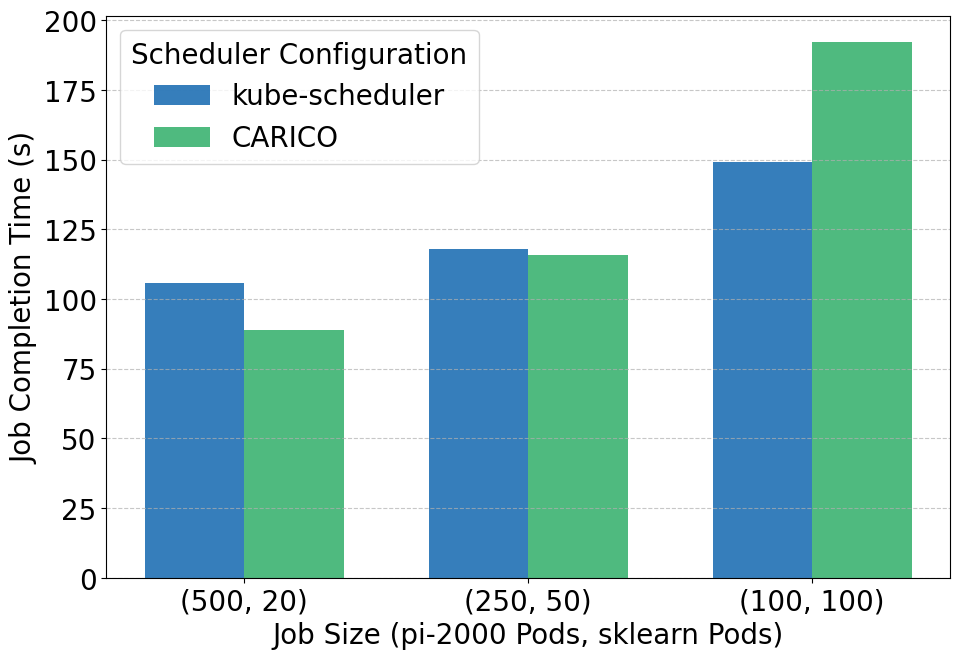

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from your LaTeX table
data = [
    {'Scheduler': 'Default', 'pi-2000': 500, 'sklearn': 20, 'Completion': 105.7, 'Error': 10.6},
    {'Scheduler': 'Carico', 'pi-2000': 500, 'sklearn': 20, 'Completion': 88.7, 'Error': 2.5},
    {'Scheduler': 'Default', 'pi-2000': 250, 'sklearn': 50, 'Completion': 118, 'Error': 4.58},
    {'Scheduler': 'Carico', 'pi-2000': 250, 'sklearn': 50, 'Completion': 115.7, 'Error': 0.58},
    {'Scheduler': 'Default', 'pi-2000': 100, 'sklearn': 100, 'Completion': 149, 'Error': 0.0},
    {'Scheduler': 'Carico', 'pi-2000': 100, 'sklearn': 100, 'Completion': 192, 'Error': 4.0},
]

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# --- Data Transformation for Plotting ---

# Define the desired order for job size combinations on the x-axis
job_size_combinations_order = [
    (500, 20),
    (250, 50),
    (100, 100)
]

# Create a composite 'Job Size' column for the x-axis labels
df['Job Size'] = df.apply(lambda row: f"({row['pi-2000']}, {row['sklearn']})", axis=1)

# Ensure the 'Job Size' categories are ordered correctly on the plot
df['Job Size'] = pd.Categorical(df['Job Size'],
                                categories=[f"({b}, {m})" for b, m in job_size_combinations_order],
                                ordered=True)

print("Transformed DataFrame for plotting:")
print(df)
print("\n")

# --- Define Custom Colors ---
# Consistent with previous requests: blue for Default, green for Carico
custom_colors = {
    'Default': plt.cm.Blues(0.75), # A mid-range blue
    'Carico': 'mediumseagreen'     # A nice shade of green
}

# --- Define Custom Legend Labels ---
# Consistent with previous requests for 'kube-scheduler'
legend_labels = {
    'Default': 'kube-scheduler',
    'Carico': 'CARICO'
}

# --- Plotting with Matplotlib ---

# Get unique job sizes (x-axis categories) and schedulers (for grouping)
job_sizes = df['Job Size'].unique()
schedulers = df['Scheduler'].unique() # This will be ['Default', 'Carico']

num_schedulers = len(schedulers) # Number of bars per group (2 in this case)
bar_width = 0.35 # Width of each individual bar
x_positions = np.arange(len(job_sizes)) # Base x-positions for each group of bars

plt.figure(figsize=(10, 7)) # Adjust figure size for good readability

# Loop through each scheduler to plot its bars
for i, scheduler in enumerate(schedulers):
    # Calculate the offset for the current scheduler's bars within each 'Job Size' group
    # This ensures bars are plotted side-by-side
    offset = (i - num_schedulers / 2 + 0.5) * bar_width

    # Filter data for the current scheduler and ensure the order matches job_sizes
    scheduler_data = df[df['Scheduler'] == scheduler].set_index('Job Size').loc[job_sizes]

    completion_values = scheduler_data['Completion'].values
    # error_values = scheduler_data['Error'].values

    # Get the appropriate color and legend label from our custom dictionaries
    color = custom_colors.get(scheduler, 'gray') # Defaults to gray if not found
    current_label = legend_labels.get(scheduler, scheduler) # Defaults to original name if not found

    plt.bar(x_positions + offset,
            completion_values,
            bar_width,
            # yerr=error_values, # Add error bars based on the 'Error' column
            capsize=5,         # Size of the caps on the error bars
            label=current_label,
            color=color,
            alpha=0.9          # Slightly transparent for visual clarity
           )

# Set x-ticks to be at the center of each group and label them with 'Job Size'
plt.xticks(x_positions, job_sizes, rotation=0) # No rotation needed for these labels

plt.xlabel('Job Size (pi-2000 Pods, sklearn Pods)') # More descriptive x-axis label
plt.ylabel('Job Completion Time (s)')
# plt.title('Job Completion Time for Different Job Sizes and Schedulers', fontsize=16)
plt.legend(title='Scheduler Configuration', loc='upper left') # Place legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid on the y-axis
plt.tight_layout() # Adjust layout to make space for the legend
plt.savefig(f'figures/mixed-job-completion.pdf')
plt.show()